In [1]:
import pandas as pd
from datetime import datetime
import datetime as dt 
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import re


In [2]:
dataset = pd.read_excel('latencies by service.xlsx')


In [3]:
dataset.head()

,service,created_at,updated_at,day,latencies
0,12047,2023-03-19 21:00:38.306 -0300,2023-03-19 21:59:38.574 -0300,2023-03-19 21:59:38.339 -0300,"6410,6774,6470,6346,7002,7938,6588,8353,6516,7..."
1,12047,2023-03-19 13:00:38.486 -0300,2023-03-19 13:59:39.271 -0300,2023-03-19 13:59:38.245 -0300,"6481,10298,8093,8685,8917,6827,8025,6632,9610,..."
2,12047,2023-03-20 13:00:39.358 -0300,2023-03-20 13:22:38.425 -0300,2023-03-20 13:22:38.278 -0300,"34789,55006,128569,22174,13091,8721,13894,1028..."
3,12047,2023-03-19 16:00:39.295 -0300,2023-03-19 16:59:38.866 -0300,2023-03-19 16:59:38.531 -0300,"9952,19955,11971,20456,10129,8323,10520,6735,8..."
4,12047,2023-03-20 08:00:39.033 -0300,2023-03-20 08:59:38.927 -0300,2023-03-20 08:59:38.658 -0300,"7075,18412,12184,7119,7482,6441,6142,8100,8088..."


In [4]:
## Data Cleansing:
## First, We manipulate date columns to become datetime in the right format.
## Since We want to find profiles for different times of the day
## We will use the time from each created_at.


date_columns = ['created_at', 'updated_at', 'day']
for column in date_columns:
    dataset[column] = dataset[column].str.split('.')
    dataset[column] = [x[0] for x in dataset[column]]
    dataset[column] = pd.to_datetime(dataset[column])
    

In [5]:
dataset['time'] = [str(x.time()) for x in dataset['created_at']]

In [6]:
dataset['time']

0     21:00:38
1     13:00:38
2     13:00:39
3     16:00:39
4     08:00:39
5     22:00:38
6     05:00:38
7     06:00:38
8     18:00:38
9     14:00:39
10    20:00:38
11    03:00:38
12    23:00:39
13    15:00:39
14    19:00:39
15    01:00:38
16    17:00:38
17    11:00:38
18    04:00:38
19    09:00:39
20    02:00:39
21    10:00:38
22    00:00:39
23    12:00:39
Name: time, dtype: object

In [7]:
dataset['time'] = [datetime.strptime(c, '%H:%M:%S').time() for c in dataset['time']]


In [8]:
dataset['time']  = [time.hour * 3600 + time.minute * 60 + time.second for \
                    time in dataset['time']]


In [9]:
dataset.dtypes

service                int64
created_at    datetime64[ns]
updated_at    datetime64[ns]
day           datetime64[ns]
latencies             object
time                   int64
dtype: object

In [10]:
dataset['latencies'] = dataset['latencies'].str.split(',')
dataset = dataset.explode('latencies').reset_index()


In [11]:
dataset['latencies'] = dataset['latencies'].astype('float')


In [12]:
## Now, We are mostly working with 
## time x latency:
train = dataset[['latencies', 'time']]


In [13]:
## Now, we are about to understand profiles of latencies according to the time of the day:
## 

import plotly.express as px
fig  = px.scatter(train, x = 'latencies', y = 'time', log_x = True, width = 500)
fig.update_traces(marker = dict(size = 10, line=dict(width = 1)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Logaritmo de Latência X Horário')
fig.update_xaxes(title = 'Log(Latência)')
fig.update_yaxes(title = 'Horário')
fig.show()



In [14]:

linkage_data = linkage(train, method='average', metric='euclidean')


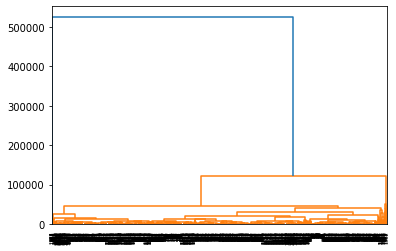

In [15]:
dendrogram(linkage_data)
plt.show()

In [16]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')


In [17]:
labels = list(hierarchical_cluster.fit_predict(train))
train['labels'] = labels
print(labels)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

/var/folders/nd/gpjjt86d6wjftk0r2r6tzfbc0000gp/T/ipykernel_87689/643719097.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



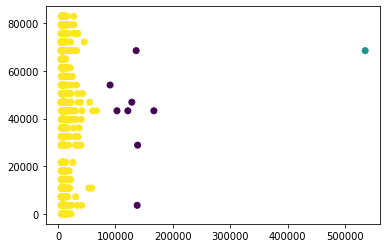

In [18]:
plt.scatter(train['latencies'], train['time'], c=labels)
plt.show()

In [19]:
aux = train.groupby('labels').describe()['latencies'].sort_values(by='min').reset_index()

In [20]:
label = []
for i in range(len(aux)):
    label.append(train[train['latencies'] == aux['min'][i]]['labels'].unique().astype('int'))


In [21]:
dict = {label[0][0]:'Boa', label[1][0]:'Ruim', label[2][0]:'Péssima'}

In [22]:
train.sort_values(by='latencies')

,latencies,time,labels
114,4791.0,46838,2
1218,4918.0,7239,2
835,4974.0,68439,2
462,5013.0,64838,2
575,5043.0,72038,2
...,...,...,...
850,136045.0,68439,0
875,137865.0,3638,0
262,138641.0,28839,0
1382,166956.0,43239,0


In [23]:
train[train['labels'].isin([0, 1])].describe()

,latencies,time,labels
count,9.000000,9.000000,9.000000
mean,173115.111111,44438.888889,0.111111
std,137490.250399,19881.906350,0.333333
min,90625.000000,3638.000000,0.000000
25%,121624.000000,43239.000000,0.000000
50%,136045.000000,43239.000000,0.000000
75%,138641.000000,54039.000000,0.000000
max,535032.000000,68439.000000,1.000000


In [24]:
train[train['labels'].isin([2])].describe()

,latencies,time,labels
count,1394.000000,1394.000000,1394.0
mean,9678.663558,42205.442611,2.0
std,5702.834884,25064.188004,0.0
min,4791.000000,39.000000,2.0
25%,7091.000000,18038.000000,2.0
50%,8131.500000,43239.000000,2.0
75%,9810.250000,64838.000000,2.0
max,66831.000000,82839.000000,2.0


In [25]:
centroids = pd.DataFrame(columns = train.columns)

for i in range(0,3):
    #aux = np.mean(train[train['labels']==i])
    s = pd.Series(np.mean(train[train['labels']==i], axis=0), index=centroids.columns)
    centroids.loc[len(centroids)] = s
    print(s)


latencies    127875.500
time          41438.875
labels            0.000
dtype: float64
latencies    535032.0
time          68439.0
labels            1.0
dtype: float64
latencies     9678.663558
time         42205.442611
labels           2.000000
dtype: float64


In [26]:
centroids['Cluster'] = centroids['labels'].replace(dict)

In [27]:
centroids

,latencies,time,labels,Cluster
0,127875.500000,41438.875000,0.0,Ruim
1,535032.000000,68439.000000,1.0,Péssima
2,9678.663558,42205.442611,2.0,Boa


In [28]:
centroids.to_excel('model_centroids.xlsx')

In [29]:
centroids

,latencies,time,labels,Cluster
0,127875.500000,41438.875000,0.0,Ruim
1,535032.000000,68439.000000,1.0,Péssima
2,9678.663558,42205.442611,2.0,Boa


In [30]:
train.to_excel('data.xlsx')